<a href="https://colab.research.google.com/github/suneelkanthala/My-Work/blob/master/ANN_Experiments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install keras

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = pd.read_csv('/content/drive/MyDrive/My Work/My_Learning/Churn_Modelling.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [3]:
X = data.iloc[:,3:13]
y = data.iloc[:,13]

In [10]:
geo = pd.get_dummies(X['Geography'], drop_first=True)
gender = pd.get_dummies(X['Gender'], drop_first=True)

In [11]:
X = pd.concat([X,geo,gender], axis=1)
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,France,Female,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,1,0


In [12]:
X.drop(columns=['Geography', 'Gender'], axis=1, inplace=True)

In [13]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
X_train.shape

(8000, 11)

In [15]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [16]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU, PReLU, ELU
from keras.layers import Dropout

In [21]:
classifier = Sequential()

classifier.add(Dense(units=6, kernel_initializer='he_uniform', activation='relu', input_dim=11))

classifier.add(Dense(units=6, kernel_initializer='he_uniform', activation='relu'))

classifier.add(Dense(units=1, kernel_initializer='glorot_uniform', activation = 'sigmoid'))


In [22]:
classifier.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 6)                 72        
_________________________________________________________________
dense_4 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 7         
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


In [25]:
classifier.compile(optimizer = 'Adamax', loss='binary_crossentropy', metrics=['accuracy'])

In [27]:
model_history=classifier.fit(X_train, y_train, validation_split=0.33, batch_size=10, epochs=100)

Epoch 1/100
536/536 [==============================] - 2s 2ms/step - loss: 0.5715 - accuracy: 0.8039 - val_loss: 0.5380 - val_accuracy: 0.7910
Epoch 2/100
536/536 [==============================] - 1s 1ms/step - loss: 0.5209 - accuracy: 0.7962 - val_loss: 0.5060 - val_accuracy: 0.7910
Epoch 3/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4879 - accuracy: 0.7921 - val_loss: 0.4882 - val_accuracy: 0.7910
Epoch 4/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4691 - accuracy: 0.8000 - val_loss: 0.4779 - val_accuracy: 0.7910
Epoch 5/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4678 - accuracy: 0.7937 - val_loss: 0.4707 - val_accuracy: 0.7910
Epoch 6/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4541 - accuracy: 0.8001 - val_loss: 0.4656 - val_accuracy: 0.7910
Epoch 7/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4655 - accuracy: 0.7822 - val_loss: 0.4619 - val_accuracy: 0.7910

In [28]:
print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


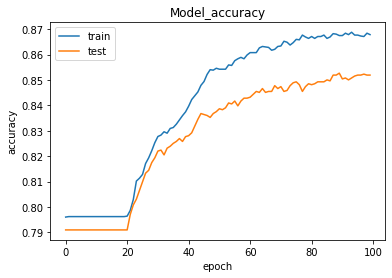

In [34]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [42]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred >0.5)

In [43]:
y_pred

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [False],
       [False]])

In [44]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [45]:
cm

array([[1540,   67],
       [ 202,  191]])

In [46]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred, y_test)

In [47]:
score

0.8655